<h1 style="text-align: center;"><center>Master&nbsp;in&nbsp;Interdisciplinary&nbsp;and&nbsp;Innovation&nbsp;Engineering Computer&nbsp;Vision</center></h1>
<h2 style="text-align: center;"><center><strong>Convolutional Neural Networks - Practice 3</strong></center></h2>
<hr />
<p style="text-align: center;"><center><br />Departament de Matem&agrave;tiques (DMAT)<br />Escola d&rsquo;Enginyeria de Barcelona Est (EEBE)<br />Universitat Polit&egrave;cnica de Catalunya (UPC)<br />2023</center></p>
<ul>
<li>Introduction</li>
<li>Convolution</li>
<li>Subsampling</li>
<li>Multilayer CNN structure</li>
</ul>



NOTES
CNN is used to clasify images whereas the MLNN is used for data classification

<h1>Practice 4</h1>

The **CIFAR-10 database** is a dataset of 60000 images, the purpose of the database is to enable the development and evaluation of image recognition algorithms. Database features:
- Size of the images of **32 x 32** pixels.
- The images are labeled in 10 different categories (labels): **airplane, automobile, bird, cat, deer, dog, frog, horse, ship and truck**.
- **Training set**: This set consists of 50000 images. Each category has 5000 images.
- **Test Set**: This set consists of 10000 images. Each category has 1000 images.
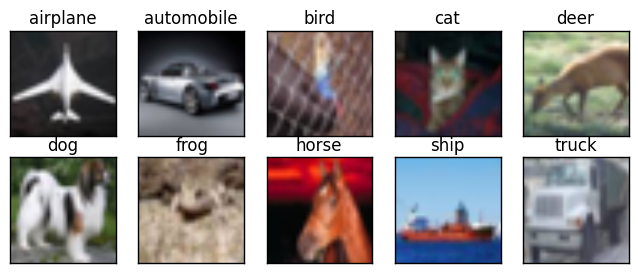
---

# 1. Data set
---

- **PyTorch:** It is a deep learning library for Python, it is used for the creation of neural networks. It has great flexibility to create custom models.

- **Torchvision** is a PyTorch library that provides pre-trained data sets, transformations and models for computer vision.

- **Transforms:** Is a PyTorch library used to transform input images into a format that can be used by machine learning models.

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
import matplotlib.pyplot as plt
import numpy as np

**1.1 Data Normalization** is used to scale data values, helps improve performance of learning models, and reduces the influence of outliers.
*   **Tensors** are the basic data structure used to represent input data, model weights, and model outputs.

In [5]:
# transform the image to a tensor (like a matrix for GPU), to normalizate it
transform = transforms.Compose([
                                transforms.ToTensor(), 
                                transforms.Normalize((0.5, 0.5, 0.5),
                                                     (0.5, 0.5, 0.5))
                                ])

**1.2 Load the CIFAR10 train and test data sets**
*   **trainloader and testloader:** We load the data in sets of 128 images, the images are loaded randomly. It is a useful technique to reduce the amount of memory needed to process the entire set of images. This technique makes the training process more efficient and effective.

In [6]:
# Train set
trainset =  torchvision.datasets.CIFAR10(root = './data', train = True, download = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 128, shuffle = True, num_workers = 2)

# Test set
testset = torchvision.datasets.CIFAR10(root = './data' , train = False , download = True , transform = transform)
testloader = torch.utils.data.DataLoader(testset, batch_size = 128, shuffle = False, num_workers = 2)

100%|██████████| 170498071/170498071 [00:13<00:00, 12402084.58it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


---
# 2. Inputs and Outputs
---

**2.1 Inputs**

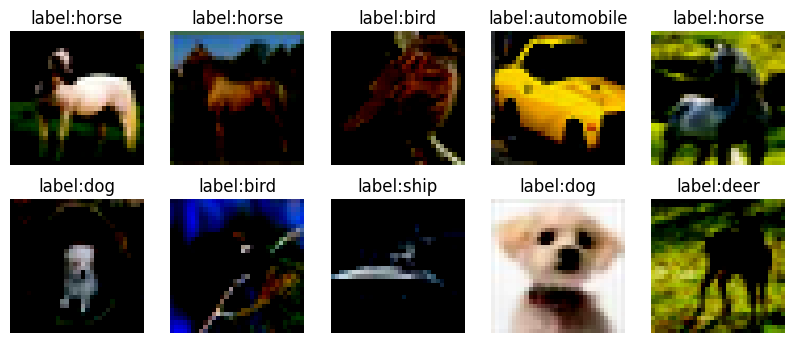

In [7]:
# Get the first 10 elements of the training set
images, labels = next(iter(trainloader))
classes = trainset.classes

# Display the first 10 elements of the training set
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    # show the image
    ax.imshow(images[i].permute(1,2,0))
    # show the label
    ax.set_title("label:{}".format(classes[labels[i]]))
    ax.axis('off')

plt.show()

**2.2 Outputs**

In [8]:
classes = trainset.classes
print(classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


---
# 3. CNN structure
---

**3.1 Define the CNN architecture**
*   import **torch**.nn as **nn**: library to build neural networks

$$
\begin{aligned}
&\text{Conv1: } &&\mathbf{u}_1 = \text{ReLU}(\mathbf{W}_1 * \mathbf{x} + \mathbf{b}_1) \\
&\text{Pool1: } &&\mathbf{v}_1 = \text{MaxPool}(\mathbf{u}_1) \\
&\text{Conv2: } &&\mathbf{u}_2 = \text{ReLU}(\mathbf{W}_2 * \mathbf{v}_1 + \mathbf{b}_2) \\
&\text{Pool2: } &&\mathbf{v}_2 = \text{MaxPool}(\mathbf{u}_2) \\
&\text{Flatten: } &&\mathbf{v}_3 = \text{Flatten}(\mathbf{v}_2) \\
&\text{FC1: } &&\mathbf{u}_3 = \text{ReLU}(\mathbf{W}_3 \mathbf{v}_3 + \mathbf{b}_3) \\
&\text{FC2: } &&\mathbf{u}_4 = \text{ReLU}(\mathbf{W}_4 \mathbf{u}_3 + \mathbf{b}_4) \\
&\text{FC3: } &&\mathbf{y} = \mathbf{W}_5 \mathbf{u}_4 + \mathbf{b}_5
\end{aligned}
$$

In [9]:
import torch.nn as nn

In [36]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # We define the structure Conv1(in, out, kernel)
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2) # define pool (2x2)

        # We define seconf convolution in 6, out 16, 5x5
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear (16*5*5, 120) # FC1 (120)
        self.fc2 = nn.Linear(120, 84) # FC2 84 neurons
        self.fc3 = nn.Linear(84, 10) # FC3 10 output neurons

    def forward(self, x):
        # Conv1 -> Relu -> MaxPool 1
        x = self.pool(nn.functional.relu(self.conv1(x)))

        # Conv2 -> Relu -> MaxPool 2
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5) #Flatten
        x = nn.functional.relu(self.fc1(x)) # FC1-> Relu
        x = nn.functional.relu(self.fc2(x)) # FC2-> Relu
        x = self.fc3(x) # FC3
        return x

**__init__** define the layers of the neural network.
1. There is a convolution layer (**conv1**) with 3 input channels, 6 output channels and a kernel size of 5x5.
> First convolution
> *   3 input channels. In this case, the input is a color image (RGB), so it has 3 channels: red, green, and blue.
> *   6 output channels, that is, the number of filters to be applied to the input image. Each filter will produce a different "feature" of the image.
> *   Size of the kernel or filter to be used to convolve the input image. The kernel is 5x5 pixels in size.

2. A pooling layer (**pool**) is defined with a kernel size of 2x2.
3. There is another convolution layer (**conv2**) with 6 input channels, 16 output channels and a kernel size of 5x5.
4. There are three fully connected layers (fc1, fc2 and fc3) with 120, 84 and 10 neurons, respectively.


**Forward** defines how the data is propagated through the neural network.
1. The **conv1** convolution layer is applied, the **ReLU** activation function is applied, and then the **pooling** layer is applied.

2. The **conv2** convolution layer is applied, the **ReLU** activation function is applied, and then the **pooling** layer is applied.

3. **Flatten** the data with x.view(-1, 16 * 5 * 5) and step through the fully connected neuron layers **fc1**, **fc2**, and **fc3**, each followed by the ReLU activation function, except for the last layer .

4. Finally, the **output** of the neural network is returned.


In [37]:
# we call the class
net = Net()

**3.2 Initial parameters**


*  Loss function

In [38]:
loss_function = nn.CrossEntropyLoss()

*   import **torch.optim** as **optim**: provides different optimizers that are used to tune the weights of a neural network during training. The most common optimizers are SGD (stochastic gradient descending), Adam, and Adagrad.
*  Optimizer (stochastic gradient descending)

In [39]:
import torch.optim as optim

*   **.cuda()** Moves the tensors and models from the CPU to the GPU. The GPU is designed to process large amounts of data in parallel, optimizing training time.

In [40]:
net = Net().cuda() # net is the model name, Net() is the architecture

In [44]:
optimizer = optim.SGD(net.parameters(), lr = 0.01, momentum = 0.9)
optimizer = optim.Adam(net.parameters(), lr = 0.01)
optimizer = optim.Adagrad(net.parameters(), lr = 0.01, lr_decay = 0.001)

---
# 4. Train the CNN
---

*   **import time** The library is used for various timing-related functions, such as measuring execution time, waiting for a specified time before continuing program execution, etc.




In [45]:
import time

In [46]:
for epoch in range(20):
    running_loss = 0.0
    start_time = time.time() # Start time for epoch
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.cuda(), labels.cuda() # Send the data to GPU
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = loss_function(outputs, labels)
        loss.backward() # backwardpropagation
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:
            print('Epoch: %d, Batch: %5d, loss: %.3f' %
                  (epoch+1, i+1, running_loss /100))
            running_loss = 0.0
    end_time = time.time() # End time for epoch
    epoch_time = end_time - start_time
    print('Epoch: %d, Time: %d seconds' % (epoch + 1, epoch_time))

print('Finished Training')

Epoch: 1, Batch:   100, loss: 1.769
Epoch: 1, Batch:   200, loss: 1.649
Epoch: 1, Batch:   300, loss: 1.637
Epoch: 1, Time: 13 seconds
Epoch: 2, Batch:   100, loss: 1.614
Epoch: 2, Batch:   200, loss: 1.609
Epoch: 2, Batch:   300, loss: 1.617
Epoch: 2, Time: 13 seconds
Epoch: 3, Batch:   100, loss: 1.596
Epoch: 3, Batch:   200, loss: 1.593
Epoch: 3, Batch:   300, loss: 1.588
Epoch: 3, Time: 13 seconds
Epoch: 4, Batch:   100, loss: 1.569
Epoch: 4, Batch:   200, loss: 1.580
Epoch: 4, Batch:   300, loss: 1.586
Epoch: 4, Time: 17 seconds
Epoch: 5, Batch:   100, loss: 1.564
Epoch: 5, Batch:   200, loss: 1.559
Epoch: 5, Batch:   300, loss: 1.568
Epoch: 5, Time: 16 seconds
Epoch: 6, Batch:   100, loss: 1.557
Epoch: 6, Batch:   200, loss: 1.559
Epoch: 6, Batch:   300, loss: 1.565
Epoch: 6, Time: 17 seconds
Epoch: 7, Batch:   100, loss: 1.555
Epoch: 7, Batch:   200, loss: 1.557
Epoch: 7, Batch:   300, loss: 1.552
Epoch: 7, Time: 15 seconds
Epoch: 8, Batch:   100, loss: 1.543
Epoch: 8, Batch:   

---
# 5. Evaluate the CNN on the test set
---
**5.1 Accuracy**

In [47]:
with torch.no_grad():
    predictions = []
    for data in testloader:
        images , labels = data

        # Send the data to the GPU
        images , labels = images.cuda () , labels.cuda ()
        outputs = net ( images )

        # Get the predicted class
        _, predicted = torch.max(outputs.data, 1)

        # Store the predicted class
        predictions += predicted.tolist ()
print(predictions)


[3, 8, 8, 0, 6, 6, 9, 4, 5, 1, 2, 9, 6, 7, 1, 2, 3, 9, 8, 7, 7, 0, 0, 9, 7, 6, 6, 7, 9, 3, 3, 2, 2, 6, 9, 3, 7, 1, 1, 3, 9, 6, 3, 6, 0, 9, 5, 7, 7, 4, 9, 8, 6, 3, 8, 0, 5, 1, 3, 4, 7, 3, 6, 7, 6, 6, 1, 0, 5, 0, 4, 7, 8, 8, 0, 4, 9, 1, 5, 0, 8, 9, 1, 2, 5, 7, 0, 8, 8, 1, 0, 4, 8, 6, 7, 5, 6, 0, 7, 7, 3, 3, 3, 5, 1, 8, 1, 6, 3, 5, 7, 8, 4, 2, 1, 7, 0, 3, 6, 3, 8, 4, 1, 4, 8, 3, 0, 5, 3, 2, 4, 9, 1, 7, 9, 3, 9, 0, 2, 8, 6, 5, 2, 1, 8, 4, 3, 7, 3, 3, 8, 9, 1, 9, 0, 5, 2, 1, 3, 0, 2, 1, 7, 6, 0, 0, 8, 4, 7, 0, 9, 0, 8, 8, 9, 9, 0, 7, 3, 8, 0, 7, 6, 2, 7, 0, 6, 5, 7, 8, 6, 1, 9, 1, 3, 4, 8, 2, 7, 8, 3, 8, 9, 9, 1, 6, 0, 5, 7, 8, 6, 9, 9, 3, 8, 7, 0, 9, 0, 7, 7, 6, 9, 6, 5, 9, 4, 6, 2, 3, 5, 1, 3, 8, 8, 0, 4, 9, 5, 3, 1, 1, 8, 9, 0, 5, 7, 0, 2, 1, 7, 5, 9, 9, 4, 8, 6, 0, 8, 1, 8, 9, 9, 6, 0, 8, 2, 9, 7, 2, 2, 2, 6, 3, 8, 4, 8, 5, 5, 6, 9, 9, 6, 1, 9, 9, 1, 8, 7, 9, 1, 2, 6, 9, 5, 4, 5, 0, 0, 6, 7, 6, 5, 9, 6, 8, 8, 2, 9, 4, 8, 5, 0, 0, 5, 7, 4, 7, 5, 5, 4, 5, 6, 4, 3, 9, 2, 6, 8, 3, 1, 9, 4, 

In [48]:
# Create a list of true labels from the test set
true_labels = []
for data in testloader:
    _, labels = data
    true_labels += labels.tolist()
print(true_labels)

[3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9, 5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6, 0, 9, 3, 9, 7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3, 6, 2, 1, 2, 3, 7, 2, 6, 8, 8, 0, 2, 9, 3, 3, 8, 8, 1, 1, 7, 2, 5, 2, 7, 8, 9, 0, 3, 8, 6, 4, 6, 6, 0, 0, 7, 4, 5, 6, 3, 1, 1, 3, 6, 8, 7, 4, 0, 6, 2, 1, 3, 0, 4, 2, 7, 8, 3, 1, 2, 8, 0, 8, 3, 5, 2, 4, 1, 8, 9, 1, 2, 9, 7, 2, 9, 6, 5, 6, 3, 8, 7, 6, 2, 5, 2, 8, 9, 6, 0, 0, 5, 2, 9, 5, 4, 2, 1, 6, 6, 8, 4, 8, 4, 5, 0, 9, 9, 9, 8, 9, 9, 3, 7, 5, 0, 0, 5, 2, 2, 3, 8, 6, 3, 4, 0, 5, 8, 0, 1, 7, 2, 8, 8, 7, 8, 5, 1, 8, 7, 1, 3, 0, 5, 7, 9, 7, 4, 5, 9, 8, 0, 7, 9, 8, 2, 7, 6, 9, 4, 3, 9, 6, 4, 7, 6, 5, 1, 5, 8, 8, 0, 4, 0, 5, 5, 1, 1, 8, 9, 0, 3, 1, 9, 2, 2, 5, 3, 9, 9, 4, 0, 3, 0, 0, 9, 8, 1, 5, 7, 0, 8, 2, 4, 7, 0, 2, 3, 6, 3, 8, 5, 0, 3, 4, 3, 9, 0, 6, 1, 0, 9, 1, 0, 7, 9, 1, 2, 6, 9, 3, 4, 6, 0, 0, 6, 6, 6, 3, 2, 6, 1, 8, 2, 1, 6, 8, 6, 8, 0, 4, 0, 7, 7, 5, 5, 3, 5, 2, 3, 4, 1, 7, 5, 4, 6, 1, 9, 3, 

$$\text{accuracy}(y_{\text{true}}, y_{\text{pred}}) = \frac{\sum_{i=1}^{n} [y_{\text{true}, i} = y_{\text{pred}, i}]}{n}$$


In [50]:
def accuracy(y_true, y_pred):
    correct_predictions = np.sum (y_true == y_pred)
    total_predictions = len (y_true)
    accuracy = correct_predictions / total_predictions
    return accuracy

In [51]:
acc = accuracy(np.array (true_labels) , np.array (predictions))
print('Accuracy of test set: {:.2f}%'.format(acc*100))

Accuracy of test set: 43.20%


In [52]:
# Using the sklearn library
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(true_labels, predictions)
print('Accuracy of test set: {:.2f}%'.format(accuracy*100))

Accuracy of test set: 43.20%


---
# 6. Convolutional neural network with a pretrained architecture
---

**6.1 Define the CNN architecture with a pretrained architecture**
*   import **torchvision.models** as **models**: library to build neural networks. This library contains a variety of pre-trained models of convolutional neural networks for image classification, object detection, semantic segmentation, among others.

In [53]:
import torchvision.models as models

*   The **ResNet-18 model** is a pretrained convolutional neural network (CNN) model that has proven to be very effective in image classification tasks. ResNet-18 consists of 18 layers between basic convolution and pooling blocks, as well as a final softmax classification layer.

*   **ResNet-18** was pre-trained on the ImageNet dataset, which contains millions of images labeled in 1000 different classes. That is, the output of this pre-trained network will be **1000 labels**.

$$\begin{equation}
    \textbf{Input} \rightarrow 
    \textbf{Conv1} \rightarrow 
    \textbf{MaxPool} \rightarrow 
    \textbf{ResNet Block 1} \rightarrow 
    \textbf{ResNet Block 2} \rightarrow 
    \textbf{ResNet Block 3} \rightarrow 
    \textbf{ResNet Block 4} \rightarrow 
    \textbf{AvgPool} \rightarrow 
    \textbf{FC} \rightarrow 
    \textbf{Output}
\end{equation}$$

In [54]:
net = models.resnet18(pretrained=True)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 177MB/s]


*  Modify the output layer, adding one more layer that connects the **1000 labels** to the **10 labels** of this practice

In [55]:
num_ftrs = net.fc.in_features
net.fc = nn.Linear(num_ftrs, 10)

In [56]:
net = net.cuda() # CPU -->> GPU

**6.2 Initial parameters**

In [57]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()

In [58]:
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)
optimizer = optim.Adam(net.parameters(), lr = 0.001)
optimizer = optim.Adagrad(net.parameters(), lr = 0.01, lr_decay = 0.001)

**6.3 Train the CNN**

*   **6.3.1  CNN schematic training**

In [59]:
# Train the CNN
for epoch in range(10):
    running_loss = 0.0
    start_time = time.time()
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.cuda(), labels.cuda() # Send the data to GPU
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = loss_function(outputs, labels)
        loss.backward() # backwardpropagation
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:
            print('Epoch: %d, Batch: %5d, loss: %.3f' %
                  (epoch + 1, i + 1, running_loss /100))
            running_loss = 0.0
            
    end_time = time.time() # End time for epoch
    epoch_time = end_time - start_time
    print('Epoch: %d, Time: %d seconds' % (epoch + 1, epoch_time))

print('Finished Training')

Epoch: 1, Batch:   100, loss: 1.895
Epoch: 1, Batch:   200, loss: 1.130
Epoch: 1, Batch:   300, loss: 0.873
Epoch: 1, Time: 18 seconds
Epoch: 2, Batch:   100, loss: 0.611
Epoch: 2, Batch:   200, loss: 0.582
Epoch: 2, Batch:   300, loss: 0.558
Epoch: 2, Time: 24 seconds
Epoch: 3, Batch:   100, loss: 0.369
Epoch: 3, Batch:   200, loss: 0.398
Epoch: 3, Batch:   300, loss: 0.388
Epoch: 3, Time: 26 seconds
Epoch: 4, Batch:   100, loss: 0.241
Epoch: 4, Batch:   200, loss: 0.257
Epoch: 4, Batch:   300, loss: 0.254
Epoch: 4, Time: 25 seconds
Epoch: 5, Batch:   100, loss: 0.152
Epoch: 5, Batch:   200, loss: 0.156
Epoch: 5, Batch:   300, loss: 0.159
Epoch: 5, Time: 22 seconds
Epoch: 6, Batch:   100, loss: 0.097
Epoch: 6, Batch:   200, loss: 0.095
Epoch: 6, Batch:   300, loss: 0.102
Epoch: 6, Time: 18 seconds
Epoch: 7, Batch:   100, loss: 0.062
Epoch: 7, Batch:   200, loss: 0.058
Epoch: 7, Batch:   300, loss: 0.056
Epoch: 7, Time: 18 seconds
Epoch: 8, Batch:   100, loss: 0.037
Epoch: 8, Batch:   

**6.4 Evaluate the CNN on the test set**

In [60]:
with torch.no_grad():
    predictions = []
    for data in testloader:
        images, labels = data
        images, labels = images.cuda(), images.cuda() # Send the data to the GPU
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1) # Get the predicted class
        predictions += predicted.tolist () # Store the predicted class
        
true_labels = []
for data in testloader:
    _, labels = data
    true_labels += labels.tolist()

In [61]:
def accuracy(y_true, y_pred):
    correct_predictions = np.sum ( y_true == y_pred )
    total_predictions = len ( y_true )
    accuracy = correct_predictions / total_predictions
    return accuracy
    
acc = accuracy ( np.array ( true_labels ) , np.array ( predictions ))
print('Accuracy of test set: {:.2f}%'.format(acc*100))

Accuracy of test set: 80.25%


In [62]:
accuracy = accuracy_score(true_labels , predictions)
print('Accuracy of test set: {:.2f}%'.format(accuracy*100))

Accuracy of test set: 80.25%
